In [7]:
#Data Mining Project: Optimizing Blood Donation Campaigns through Data Exploration of the Blood-Transfusion Dataset.
#Names: Syeda Eman Zahra/Edgar Eduardo MATA MENDOZA

In [8]:
"""
The main focus of the project is to analyze the frequency of donors in
blood donation campaigns. To do it, first we will preprocess and manipulate
the data.
"""
# Importing all the libraries that we will use.
import pandas as pd # Libraries for numerical and data manipulation.
import numpy as np
import math
import matplotlib.pyplot as plt # Libraries for visualization.
import seaborn as sns

from sklearn.preprocessing import StandardScaler #Library to normalize the data.
from sklearn.cluster import KMeans # Library to create the Elbow Method.
from sklearn.decomposition import PCA # Library for PCA implementation.
from sklearn.mixture import GaussianMixture # Library for Gaussian Mixture Models.
from sklearn.metrics import confusion_matrix # Library to create confusion matrices.
#from google.colab import files (Only on Google Colaboratory)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # Library for HCA implementation.
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score # Library for internal metrics.


In [9]:
# Setting permissions to access the dataset saved in google drive. (Only on Google Colaboratory)
#from google.colab import drive
#drive.mount('/content/drive')

In [10]:
# Reading the dataset and save it as a pandas dataframe for further manipulation.
#df = pd.read_csv('/content/drive/MyDrive/Data Mining Project/transfusion.data') #(Only on Google Colaboratory)
df = pd.read_csv('transfusion.data')

In [11]:
# Printing the first 5 lines of the dataset to see its content.
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [12]:
# We can see that the dataset has 5 attributes: Recency, Frequency, Monetary, Time, and Whether he/she donated blood.

In [13]:
# Data Preprocessing Steps.
# Step 1: Checking for missing values.
missing_values = df.isnull().sum

if missing_values==True:
    print("There are missing values for this dataset.")
else:
    print("There are no missing values for this dataset.")

There are no missing values for this dataset.


In [14]:
# Displaying the information of the missing values of the dataset to verify
# that there are not missing values.
missing_values

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0               False              False                  False   
1               False              False                  False   
2               False              False                  False   
3               False              False                  False   
4               False              False                  False   
..                ...                ...                    ...   
743             False              False                  False   
744             False              False                  False   
745             False              False                  False   
746             False              False                  False   
747             False              False                  False   

     Time (months)  whether he/she donated blood in March 2007  
0            False                                       False  
1  

In [15]:
# Step 2: Labels of the dataset.
# Since it is assumed that the labels are unknown and we want to use unsupervised
# algorithms, the last column of the datset, which can be considered as the labels, is dropped.

df_noLabel = df.drop('whether he/she donated blood in March 2007', axis = 1)
df_noLabel.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


#Analysis of features.

In [16]:
"""
The purpose of this section will be the calculation and visualization of
histograms for the attributes of the dataset.
To do it, we will get the different columns of the dataset into numpy arrays
and then we will manipulate them.
Normalization will still not be done, since keeping the original values will
be better to analyze the histograms. Normalization will occur until re-dimension
is done.
"""

'\nThe purpose of this section will be the calculation and visualization of\nhistograms for the attributes of the dataset.\nTo do it, we will get the different columns of the dataset into numpy arrays\nand then we will manipulate them.\nNormalization will still not be done, since keeping the original values will\nbe better to analyze the histograms. Normalization will occur until re-dimension\nis done.\n'

In [17]:
# Extracting numpy arrays for the different attributes.
recency = df_noLabel['Recency (months)'].values
frequency = df_noLabel['Frequency (times)'].values
monetary = df_noLabel['Monetary (c.c. blood)'].values
time = df_noLabel['Time (months)'].values

# Creating an array that saves the attributes.
attributes = np.array([recency,frequency,monetary,time])

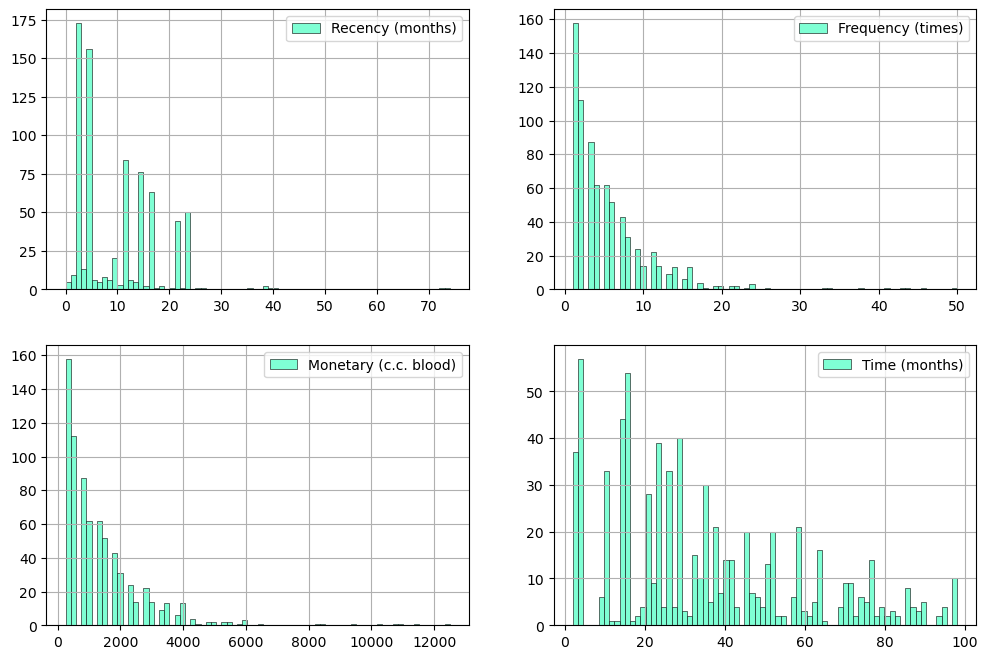

In [18]:
# Plotting the histograms in the form of a 2x2 array.
plt.figure(figsize=(12, 8))  # Setting the size of the histograms.

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.hist(attributes[i], label=list(df_noLabel.columns)[i], bins=74, edgecolor='black', linewidth=0.4, color='aquamarine')
    plt.grid()
    plt.legend()

plt.show()

In [19]:
"""
Now we can analyze the histograms. Although, we still do not know if all the
people involved here donated or not in this campaign, since we do not have the
labels.
"""

'\nNow we can analyze the histograms. Although, we still do not know if all the\npeople involved here donated or not in this campaign, since we do not have the\nlabels.\n'

# Dimension reduction using Principal Components Analysis (PCA).

In [20]:
"""
In this section, PCA is used to redimensionate the 4 components data
(1 dimension per attribute) into a 2 components data. Let us remember that PCA
focuses on keeping the variance of the elements in the dataset.
Thus we will be able to visualize the data in a 2 dimension plot, and implement
the clustering algorithms to see if is possible to label the data.
"""

'\nIn this section, PCA is used to redimensionate the 4 components data\n(1 dimension per attribute) into a 2 components data. Let us remember that PCA\nfocuses on keeping the variance of the elements in the dataset.\nThus we will be able to visualize the data in a 2 dimension plot, and implement\nthe clustering algorithms to see if is possible to label the data.\n'

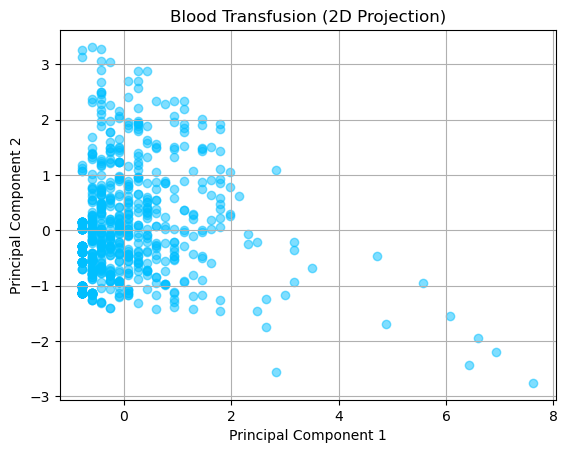

In [21]:
# Applying PCA for dimensionality reduction.
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization purposes.
pca_data = pca.fit_transform(df_noLabel) # Fitting with the no labeled data.

# Creating a DataFrame for the PCA results.
pca_data_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2'])
pca_data_df_norm = StandardScaler().fit_transform(pca_data_df) # Normalizing the data.
pca_data_df = pd.DataFrame(pca_data_df_norm,columns = pca_data_df.columns) # Retrieving the normalized datasets that we will use from now on.
pca_data = pca_data_df.values #Convert the normalized dataframe to a numpy array.
# Visualizing the PCA results.
plt.scatter(pca_data_df['Principal Component 1'], pca_data_df['Principal Component 2'], alpha=0.5, color='deepskyblue')
plt.title('Blood Transfusion (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

#The scatter plot below shows the dataset projected onto the first two principal components.

In [22]:
#Displaying the re-dimensionated data.
print('Dataset after dimension reduction:\n')
pca_data_df

Dataset after dimension reduction:



,Principal Component 1,Principal Component 2
0,7.622950,-2.760623
1,1.282554,-1.418430
2,1.796649,-1.451130
3,2.482114,-1.463468
4,3.167741,-0.359993
...,...,...
743,-0.602221,0.790047
744,-0.602118,1.493311
745,-0.430699,1.893351
746,-0.773574,1.125536


In [23]:
# Displaying the variance explained by each principal component.
# This is done to provide an idea about how much information of the
# original dataset each component contains.
explained_variance = pca.explained_variance_ratio_
print('The variance explained for principal component 1 is: ',explained_variance[0])
print('The variance explained for principal component 2 is: ',explained_variance[1])

The variance explained for principal component 1 is:  0.9998039339468991
The variance explained for principal component 2 is:  0.0001709925864370629


# Elbow Method for K-Means

In [24]:
"""
In this section we will implement the 'Elbow Method', which is used to determine
the optimal number of clusters to be chosen for the K-Means algorithm (since
we assume we do not know that 2 labels is required for it).

First the K-Means algorithm from the sklearn library will be used for this,
after that, a couple of implementations without that library will be done.
"""

"\nIn this section we will implement the 'Elbow Method', which is used to determine\nthe optimal number of clusters to be chosen for the K-Means algorithm (since\nwe assume we do not know that 2 labels is required for it).\n\nFirst the K-Means algorithm from the sklearn library will be used for this,\nafter that, a couple of implementations without that library will be done.\n"

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


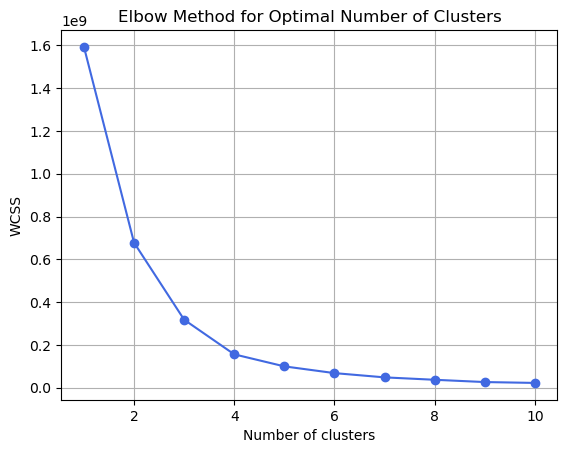

In [25]:
# Applying the Elbow Method to find the optimal number of clusters for K-means.
wcss = []  # List to save the 'Within-cluster sum of squares'.
for i in range(1, 11): # Different number of clusters are tested; from 1 to 10.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_noLabel)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method.
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='royalblue')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [26]:
# Based on the plot from elbow method (the 'elbow point', i.e., the point at
# which the graph curves), we proceed with k-means algorithm with 2 clusters.

# K-Means Implementations

In [27]:
"""
In this section we will implement 2 different k-means algorithms to get the labels
and verify their development with respect our data. One algorithm will be created
using Object-Oriented Programming (OOP), whereas the other one will simply be created using
functions.
"""

'\nIn this section we will implement 2 different k-means algorithms to get the labels\nand verify their development with respect our data. One algorithm will be created\nusing Object-Oriented Programming (OOP), whereas the other one will simply be created using\nfunctions.\n'

In [28]:
"""
Object-Oriented Programming K-Means implementation.
"""
# Defining the K MeansCustom class.
class KMeansCustom:
    def __init__(self, n_clusters=2, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None

# Defining the constructor to initialize the attributes of the class.
    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids
# Defining the methods that will be used in 'fit', such as getting the distance
# from each point to each cluster, assign the cluster on which each point belongs,
# update the centers after iterations.
    def compute_distances(self, X, centroids): #Get the distance from each point to
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return distances

    def assign_clusters(self, distances):
        return np.argmin(distances, axis=0)

    def update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = X[labels == k].mean(axis=0)
        return centroids
# Method used to fit the K-Means model.
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            distances = self.compute_distances(X, self.centroids)
            labels = self.assign_clusters(distances)
            new_centroids = self.update_centroids(X, labels)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
        return labels

# Applying K-Means from scratch to the PCA-reduced data.
kmeans_custom = KMeansCustom(n_clusters=2)
kmeans_labels = kmeans_custom.fit(pca_data) # Fitting the model to get the labels.

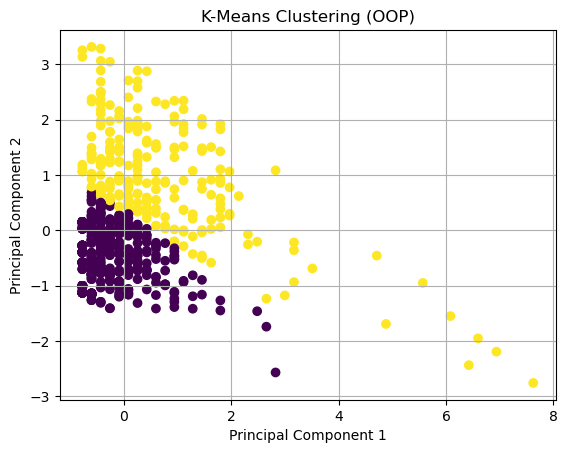

In [29]:
# Plotting the new clusters using K-means labels.
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis',  marker='o')
plt.title('K-Means Clustering (OOP)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

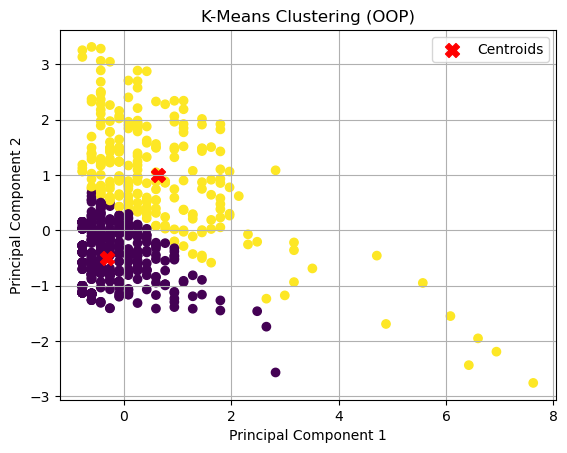

The new centers of clusters are:
[[-0.32008216 -0.50091262]
 [ 0.6414498   1.00383694]]


In [30]:
# Plotting the results with the new centroids.
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.scatter(kmeans_custom.centroids[:, 0], kmeans_custom.centroids[:, 1], s=100,label='Centroids', c='red', marker='X')
plt.title('K-Means Clustering (OOP)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

#Show the new clusters.
print("The new centers of clusters are:")
print(kmeans_custom.centroids)

In [31]:
# Internal Validation Metrics.

# To use the internal validation metrics, we will use the Silhouette Index, which
# can be used from the module 'sklearn.metrics'. We use our 2-dimensional dataset,
# as well as the labels obtained for each point using K-means.
k_oop_score = silhouette_score(pca_data,kmeans_labels)
print('Silhouette Index: ',k_oop_score)

Silhouette Index:  0.45253260212323293


In [32]:
# Let us remember that, if the value of the Silhouette Index is near to 1, it
# means that the points could be associated to a specific cluster, or in other
# words, the clustering could be implemented appropriately.

In [33]:
"""
Functions-based K-Means implementation.
"""
# This function gets the distance from each randmon initial point to a cluster and saves it in a matrix.
def DistanceMatrix(centers,X):
    dist = []
    distM = []
    for i in range(len(X)):
        for j in range(2):
            dist.append(math.dist(X[i],centers[j])) # Geting the distance from i-point to j-cluster.
        distM.append(dist)
        dist = []
    binary=np.array(distM) # Converting into numpy array for easier manipulation.
    return binary

In [34]:
# This function returns a matrix which indicates the cluster of each point, i.e., gives the labels.
def Membership(distances):
    membership = []
    gamma = []
    minimum = []
    for i in range(len(distances)):
        minimum.append(min(distances[i])) # Taking the shortest distance.
    for j in range(len(distances)):
        for k in range(2):
            if minimum[j] == distances[j][k]:
                membership.append(1)
            else:
                membership.append(0)
        gamma.append(membership)
        membership = []
    return np.array(gamma)

In [35]:
# This function updates the clusters and returns new ones.
def Update(gamma,X):
    n = 0
    mu = []
    sum = np.array([0,0])
    cluster = []
    for i in range(2):
        for j in range(len(X)):
            if gamma[j][i] == 1:
                n = n + 1
        for k in range(len(X)):
            mu.append(gamma[k][i]*X[k])
        muf=np.array(mu)
        for l in range(len(X)):
            sum = sum + muf[l]
        average = sum/n
        cluster.append(average)
        # Re-starting values for next iteration for the following cluster i.
        n = 0
        mu = []
        muf = np.array([0,0])
        sum = np.array([0,0])
    return np.array(cluster)

In [36]:
# We define 2 random points from the numpy data to initialize the algorithm.
centers = np.array([pca_data[0],pca_data[100]])
# We use the k-means with 20 iterations.
for w in range(20):
    # Geting the distance from each point to each cluster.
    distances = DistanceMatrix(centers,pca_data)
    # We get the 'gamma' matrix, which determines in which cluster each point belong.
    gamma = Membership(distances)
    # Updating the clusters centers.
    clusters = Update(gamma,pca_data)

In [37]:
# After implementing k-means, we get the labels using the gamma matrix.
k_labels = []
for i in range(len(gamma)):
  if gamma[i][0]==1:
    k_labels.append(1)
  else:
    k_labels.append(0)
k_labels = np.array(k_labels)

The new centers of clusters are:
[[ 6.10220092 -1.75066626]
 [-0.06596974  0.01892612]]


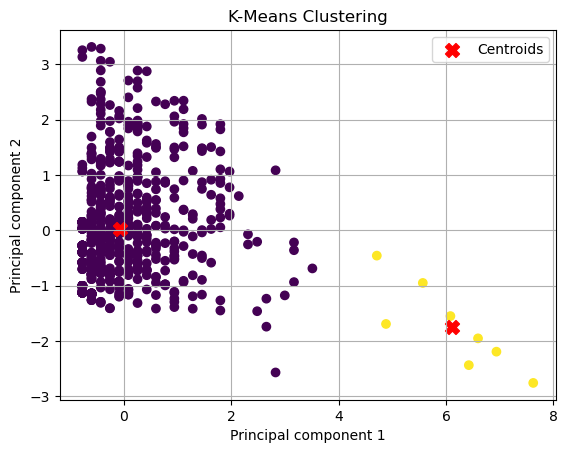

In [38]:
# Plotting the new centers of the final clusters.
plt.scatter(pca_data[:,0],pca_data[:,1],c=k_labels, cmap='viridis',marker='o')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('K-Means Clustering')
plt.grid()
plt.scatter(clusters[:,0], clusters[:,1], s=100, c = 'red',label='Centroids',marker = 'X')
plt.legend()
# Showing the new clusters.
print("The new centers of clusters are:")
print(clusters)

In [39]:
#Internal Validation Metrics.
k_score = silhouette_score(pca_data,k_labels)
print('Silhouette Index:',k_score)

Silhouette Index: 0.7604203407168241


# Gaussian Mixture Models

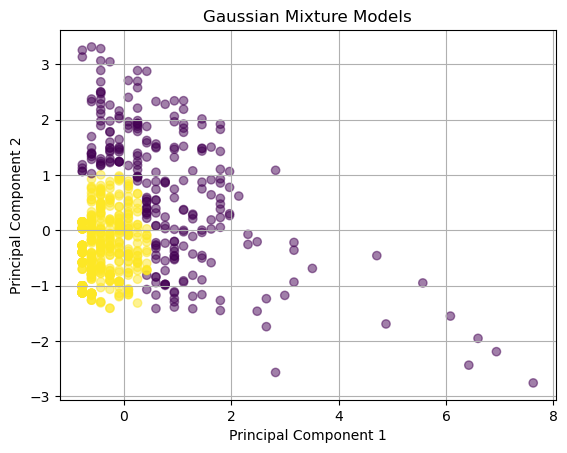

In [40]:
"""
In this section the Gaussian Mixture Models algorithm (GMM) will be implemented
using the available libraries to create and fit the model.
"""
gmm = GaussianMixture(n_components=2,random_state=10) # Creating the model with sklearn library,
                                                      # specifying a random state to see reproducible results.
gmm_labels = gmm.fit_predict(pca_data) # Fitting the model with our data.

# Plotting GMM results.
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('Gaussian Mixture Models')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

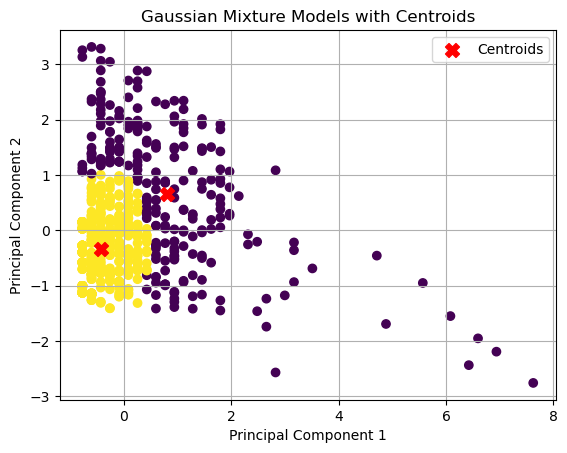

In [41]:
# Extracting the centroids of the GMM.
gmm_centroids = gmm.means_

# Plotting GMM results with the obtained centroids.
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm_labels, cmap='viridis', marker='o')
plt.scatter(gmm_centroids[:, 0], gmm_centroids[:, 1], s=100, c='red', label='Centroids', marker='X')
plt.title('Gaussian Mixture Models with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [42]:
# Internal validation metrics.
gmm_score = silhouette_score(pca_data,gmm_labels)
print('Silhouette Index:',gmm_score)

Silhouette Index: 0.4307132158120979


# Hierarchical Clustering Algorithm


In [45]:

"""
In this section we will implement the Hierarchical Clustering Algorithm (HCA)
to see the differences in the final clusters detected for the dataset.

To use it, we will use the module 'scipy.cluster.hierarchy' and the functions
'linkage, dendrogram, fcluster', 'AgglomerativeClustering'.
"""

"\nIn this section we will implement the Hierarchical Clustering Algorithm (HCA)\nto see the differences in the final clusters detected for the dataset.\n\nTo use it, we will use the module 'scipy.cluster.hierarchy' and the functions\n'linkage, dendrogram, fcluster', 'AgglomerativeClustering'.\n"

In [46]:
# Defining a list with different criterias (covered in the lectures) to be
# used for the HCA algorithm and linkage matrices.
criterias = ['single','complete','average','ward']

"""
We will use 'linkage' to get the linkage matrix of our dataset.
This matrix consists in 4 columns. The first 2 columns are the indices of the
2 clusters that are merged in each iteration. The third column is the distance
between the merged clusters, and the fourth one is the number of points that
created the merged cluster.
"""

#Getting the linkage matrices for each criteria.
hca_linkages = []
for i in criterias:
  hca_linkages.append(linkage(pca_data, i))
hca_linkages = np.array(hca_linkages)

# Applying Hierarchical Clustering Algorithm (HCA) to our dataset for the
# different criterias.
hca_labels = []
for i in criterias:
  hca = AgglomerativeClustering(n_clusters=2, linkage = i) # Creating a model for 2 clusters and the 'i' criteria.
  hca_labels.append(hca.fit_predict(pca_data)) # Getting the labels for each criteria.

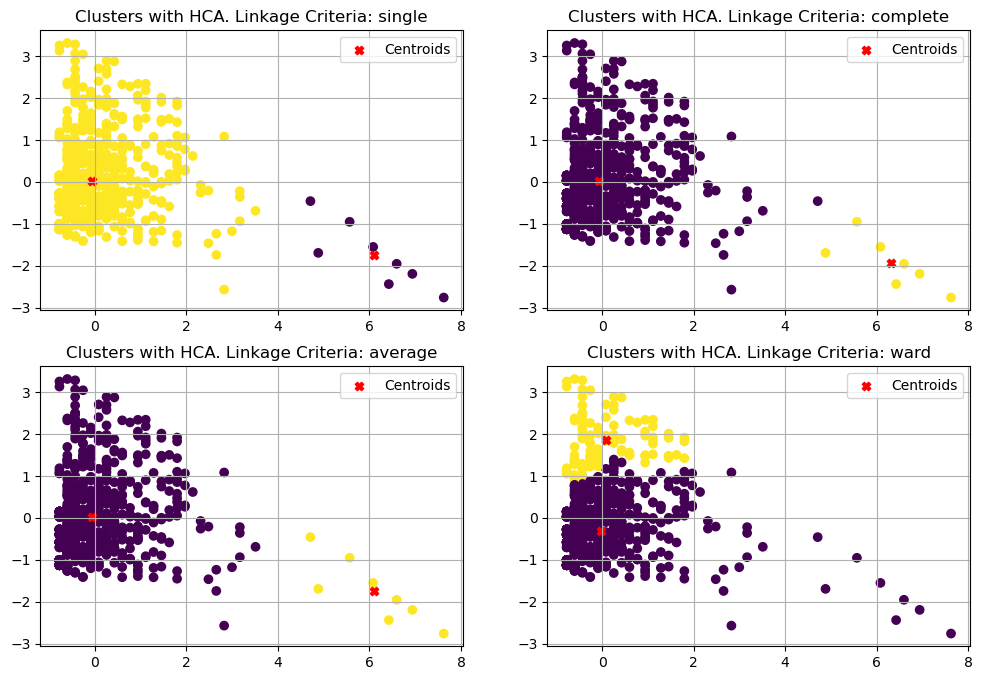

In [47]:
# Plotting the centers to see if there is difference when using one criteria or other.
cluster_centers = []
num_clusters = 2 # Taking '2', since for each criteria we want (and chose) 2 clusters.
for i in range(4): # Going through the 4 different criteria.
  cluster_aux = []
  for j in range(num_clusters):
    cluster_mask = (hca_labels[i] == j) # Creating a mask for each label.
    cluster_data = pca_data[cluster_mask] # Identifying the points with label 1 and, later, 2.
    center = np.mean(cluster_data, axis=0) # Obtaining the center of the cluster using the mean of point of the '1' or '2' points.
    cluster_aux.append(center)
  cluster_centers.append(cluster_aux)
cluster_centers = np.array(cluster_centers) # Converting into numpy array.

# Plotting the clusters obtained with the different criteria.
plt.figure(figsize=(12, 8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.scatter(pca_data[:,0],pca_data[:,1],c=hca_labels[i], cmap='viridis', marker='o')
  plt.scatter(cluster_centers[i][0][0],cluster_centers[i][0][1],color = 'red',marker='X',label = 'Centroids')
  plt.scatter(cluster_centers[i][1][0],cluster_centers[i][1][1],color = 'red',marker='X')
  plt.title(f'Clusters with HCA. Linkage Criteria: {criterias[i]}')
  plt.grid()
  plt.legend()

In [ ]:
# Set the criteria for HCA linkage
criterias = ['single', 'complete', 'average', 'ward']

# Generate the linkage matrix for each method
hca_linkages = [linkage(df_noLabel, method=criteria) for criteria in criterias]

# Plotting the dendrograms using the 'dendrogram' method and the linkage matrices.
plt.figure(figsize=(25, 15))  # Increased figure size for better legibility.
for i, (linkage_matrix, criteria) in enumerate(zip(hca_linkages, criterias)):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each linkage method.
    dendrogram(
        linkage_matrix,
        leaf_font_size=10,  # Adjusted font size for leaf labels.
        truncate_mode='lastp',  # Only show the last p merged clusters.
        p=12,  # Show only the last 12 merged clusters.
        show_contracted=True  # Draw black dots at heights of last p merged clusters.
    )
    plt.title(f'HCA Method: {criteria}')
    plt.xlabel('Index of Points (or Number of Points in Cluster)')
    plt.ylabel('Distance')
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better legibility.

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjusting the spacing between subplots.
plt.show()  # Show the plot.


In [70]:
#Internal Validation Metrics.
hca_score = []
for i in range(4):
  print(f'Silhouette Index for \033[1m{criterias[i]}\033[0m criteria:',silhouette_score(pca_data,hca_labels[i]))

Silhouette Index for single criteria: 0.7604203407165803
Silhouette Index for complete criteria: 0.7670982548280759
Silhouette Index for average criteria: 0.7604203407165803
Silhouette Index for ward criteria: 0.4436281909156777


# External indexes.

In [71]:
"""
In this section we will use the labels provided in the dataset and compare some
results with the labels obtained using K-means, GMM and HCA.
"""

'\nIn this section we will use the labels provided in the dataset and compare some\nresults with the labels obtained using K-means, GMM and HCA.\n'

In [72]:
# Comparing the labeled points of our 2-dimensional dataset.
# To do it, we plot the points and identify them with the color of their cluster.

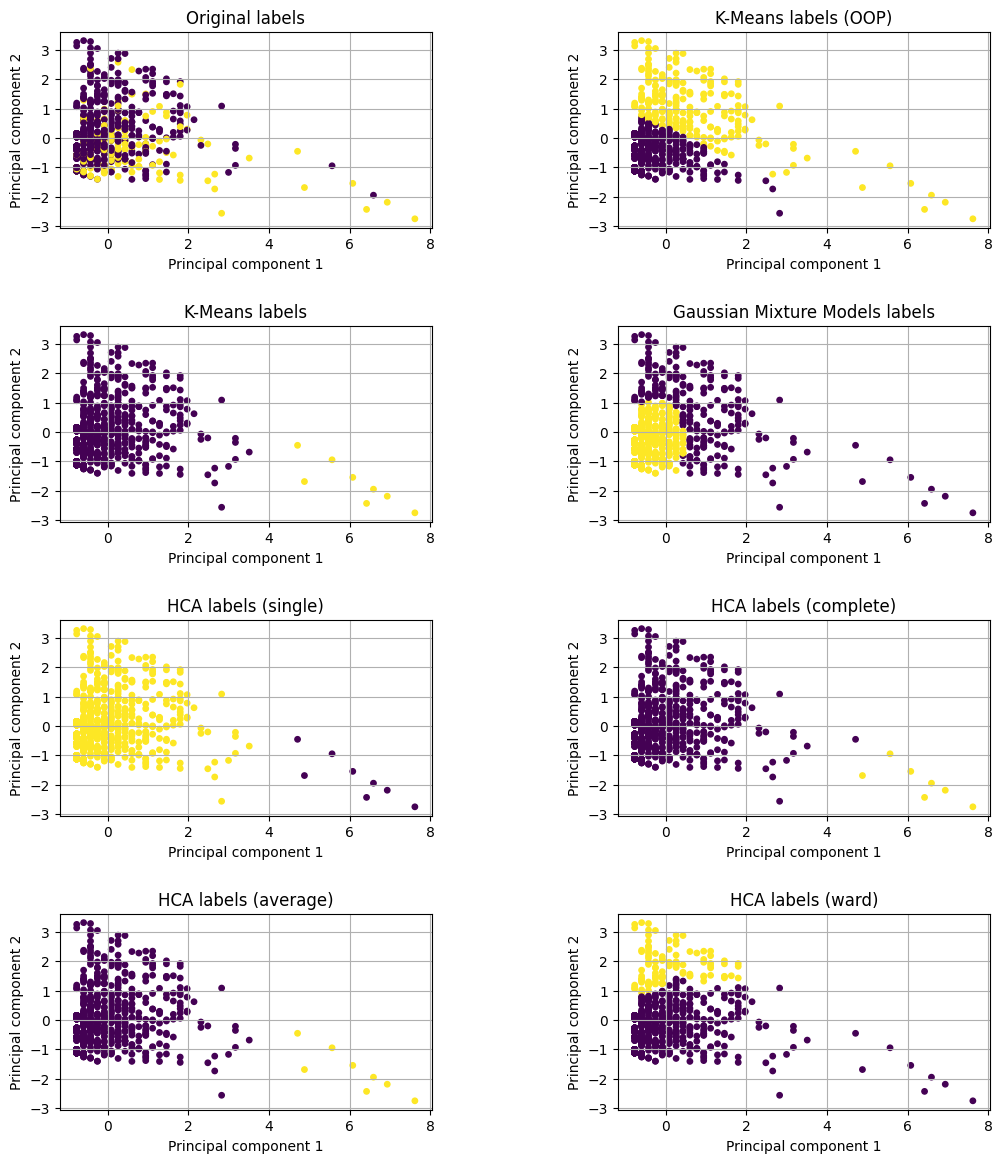

In [73]:
og_labels = df['whether he/she donated blood in March 2007'].values # Getting the true labels of the original dataset.

labels = [og_labels,kmeans_labels,k_labels,gmm_labels] # Saving all the labels in a list to use them in the loop.
for i in range(4):
  labels.append(hca_labels[i])

titles = ['Original labels','K-Means labels (OOP)','K-Means labels','Gaussian Mixture Models labels',
          'HCA labels (single)','HCA labels (complete)','HCA labels (average)','HCA labels (ward)']
plt.figure(figsize=(12, 14))
for i in range(8):
  plt.subplot(4,2,i+1)
  scatter = plt.scatter(pca_data[:,0],pca_data[:,1],c=labels[i],cmap = 'viridis',s=15)
  plt.title(titles[i])
  plt.xlabel('Principal component 1')
  plt.ylabel('Principal component 2')
  plt.grid()
  plt.subplots_adjust(wspace=0.5,hspace=0.5)  # Adjusting the horizontal and vertical space between subplots.

In [74]:
"""
We can see that the K-Means (OOP) and the HCA (ward criteria) worked practically
on the same way. According to the original labels, those algorithms might be the
best ones, since the identification of the number of points for each cluster seems
to match better with the number of points identified with the original labels.
"""

'\nWe can see that the K-Means (OOP) and the HCA (ward criteria) worked practically\non the same way. According to the original labels, those algorithms might be the\nbest ones, since the identification of the number of points for each cluster seems\nto match better with the number of points identified with the original labels.\n'

In [75]:
"""
'seaborn' library in Python will be used to visualize data easily.
This implementation was considered after searching information about the dataset
and finding the following manipulation on it:
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_blood_transfusion.html
"""

"\n'seaborn' library in Python will be used to visualize data easily.\nThis implementation was considered after searching information about the dataset\nand finding the following manipulation on it:\nhttps://inria.github.io/scikit-learn-mooc/python_scripts/datasets_blood_transfusion.html\n"

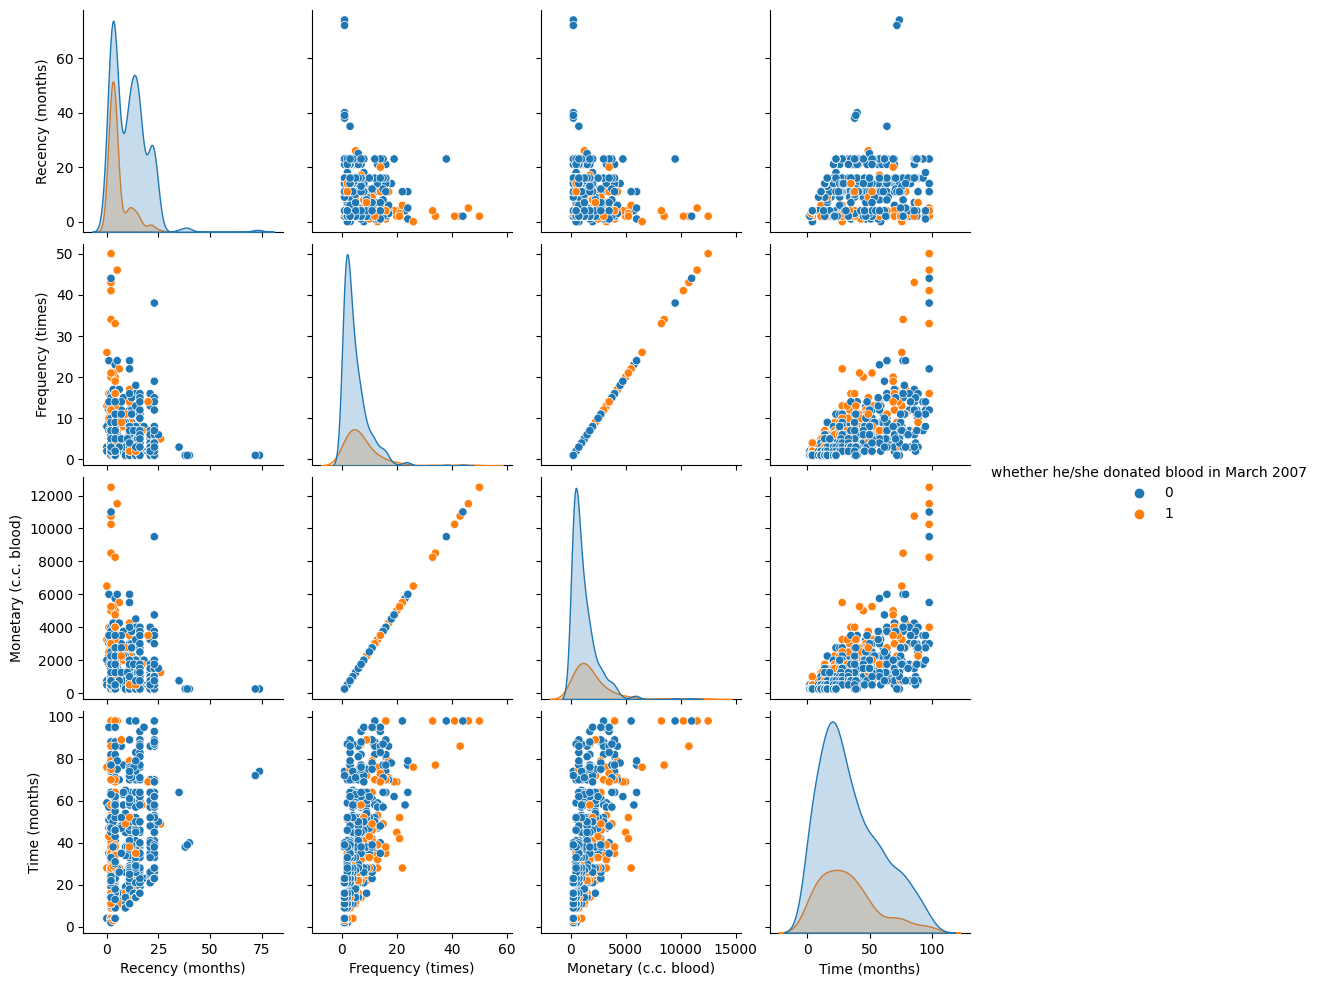

In [76]:
"""
To have a quick visualization of the variables we will use the function
'pairplot', which returns a matrix with plots of all the combinations between
the variables.
"""

# Plotting with the original labels.
original_pairplot = sns.pairplot(df, hue="whether he/she donated blood in March 2007")

In [77]:
"""
Now we create the same scatterplots with the labels obtained from the HCA. To
avoid having several plots, only the comparasion with the K-Means (OOP) will be
used.
"""



'\nNow we create the same scatterplots with the labels obtained from the HCA. To\navoid having several plots, only the comparasion with the K-Means (OOP) will be\nused.\n'

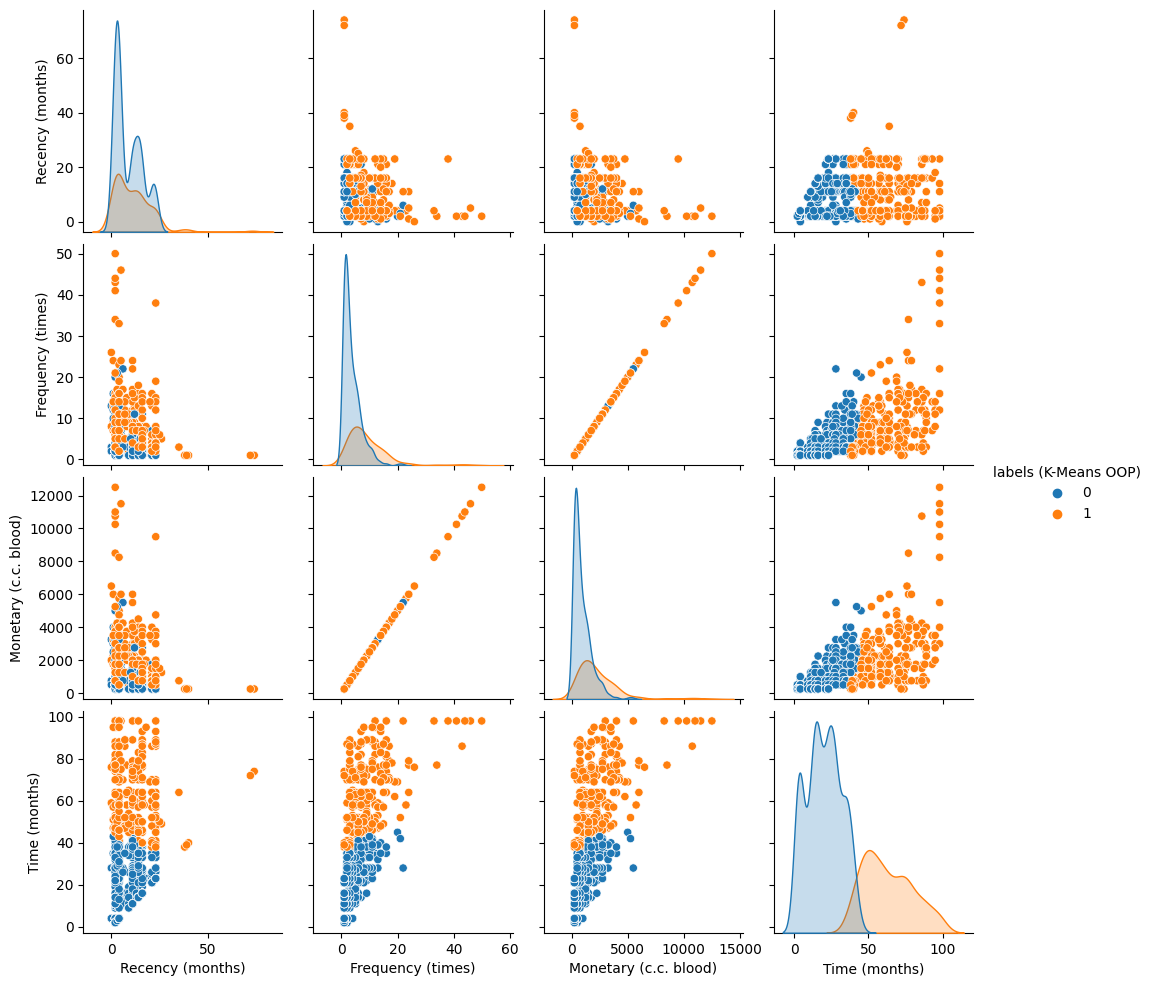

In [78]:
# Creating a dataframe with the new HCA 'ward' labels.
df_km = df_noLabel # Getting the dataframe without labels.
df_km['labels (K-Means OOP)'] = kmeans_labels # Adding a new column with the labels obtained from HCA.
km_pairplot = sns.pairplot(df_km, hue="labels (K-Means OOP)") # Creating scatterplots with HCA labels.

Accuracy of model for predicting:  0.5548128342245989


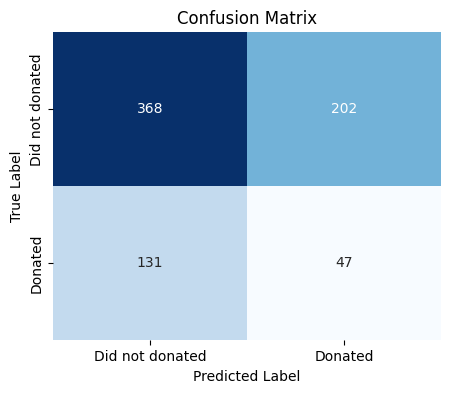

In [79]:
#Finally, we get the confusion matrix to see the True/False Positive/Negative.
cm = confusion_matrix(og_labels,kmeans_labels) # Creating confusion matrix.
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=['Did not donated','Donated'],yticklabels = ['Did not donated','Donated'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
print('Accuracy of model for predicting: ',np.trace(cm)/np.sum(cm)) # Getting and printing the accuracy given the confusion matrix.

In [80]:
"""
We can see that, according to our confusion matrix, there are a few False Negatives
(i.e., Positive values identified as Negative) and several False Positives. Although our
model is able to create the needed clusters properly, the Blood Transfusion Dataset might
not be very suitable for clustering tasks, since there can exist a confusion on identifying
properly the people who truly donated over the False Negatives/False Positives.
"""

'\nWe can see that, according to our confusion matrix, there are several False Negatives\n(i.e., Positive values identified as Negative) and a few False Positives. Although our\nmodel is able to create the needed clusters properly, the Blood Transfusion Dataset might\nnot be very suitable for clustering tasks, since there can exist a confusion on identifying\nproperly the people who truly donated over the False Negatives/False Positives.\n'